## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [21]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
#%matplotlib inline

In [22]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


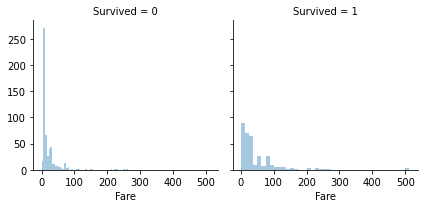

In [27]:
g=sns.FacetGrid(df_train,col="Survived")
g.map(sns.distplot,'Fare',kde=False)
#票差相差較大，甚至有0元票價，不太合理，要查詢一下原因

## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [28]:
import numpy as np

def outfiles_z_score(ys,times):
    mean_y=np.mean(ys)
    stdev_y=np.std(ys)
    z_scores=[(y-mean_y)/stdev_y for y in ys]
    return np.where(np.abs(z_scores)>times)


out_index=outfiles_z_score(df_train['Fare'],3) 
print(out_index[0])
print(df_train.loc[out_index[0],'Fare'])

#超過3倍標準差的值過多，

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


## 方法3-盒鬚圖判別法(IQR method)

In [14]:
import numpy as np

def outliers_iqr(ys,times):
    quartile_1,quartile_3=np.nanpercentile(ys,[25,75])
    iqr=quartile_3-quartile_1
    lower_bound=quartile_1-(iqr*times)
    upper_bound=quartile_3+(iqr*times)
    return np.where((ys>upper_bound)|(ys<lower_bound))

In [17]:
out_index2=outliers_iqr(df_train['Fare'],1.5)
print(out_index2)
print(df_train.loc[out_index2[0],'Fare'])

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
       311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
       375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
       496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
       585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
       689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
       779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]),)
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


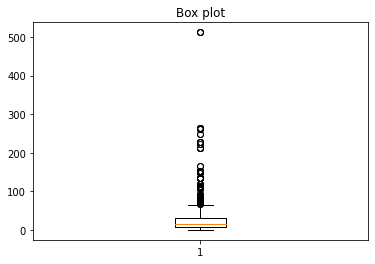

In [30]:
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=1.5)
plt.title('Box plot')
plt.show()
#超出1.5iqr的值相當多，要進一步檢視，是否因偏差值過多，而影響分析結果

In [29]:
out_index3=outliers_iqr(df_train['Fare'],2)
print(out_index3)
print(df_train.loc[out_index3[0],'Fare'])

(array([ 27,  31,  34,  61,  62,  88, 102, 118, 124, 139, 195, 215, 224,
       230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299,
       305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 337, 341, 373,
       375, 377, 380, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496,
       498, 504, 505, 520, 527, 537, 544, 550, 557, 558, 581, 585, 587,
       591, 609, 627, 659, 660, 679, 689, 698, 700, 708, 716, 730, 737,
       741, 742, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856,
       879]),)
27     263.0000
31     146.5208
34      82.1708
61      80.0000
62      83.4750
         ...   
829     80.0000
835     83.1583
849     89.1042
856    164.8667
879     83.1583
Name: Fare, Length: 92, dtype: float64


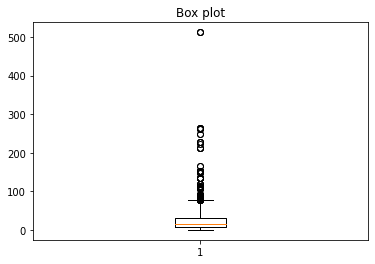

In [32]:
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=2)
plt.title('Box plot')
plt.show()
#超出2倍iqr值的相當多，要進一步檢視，是否因偏差值過多，而影響分析結果

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


資料有分艙等，這應與票價有關，進一步觀察艙等與票價的分佈，若超出3倍標準差或1.5倍的iqr可考慮刪除。

In [34]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [62]:
df_train_class1=df_train[df_train['Pclass']==1]
df_train_class1.reset_index(drop=True,inplace=True)
df_train_class2=df_train[df_train['Pclass']==2]
df_train_class2.reset_index(drop=True,inplace=True)
df_train_class3=df_train[df_train['Pclass']==3]
df_train_class3.reset_index(drop=True,inplace=True)

### 使用3倍標準差判別

In [63]:
df_train_class1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
4,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
211,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
212,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
213,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
214,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [65]:
import numpy as np

def outfiles_z_score(ys,times):
    mean_y=np.mean(ys)
    print("平均值:",mean_y)
    stdev_y=np.std(ys)
    print("標準差:",stdev_y)
    z_scores=[(y-mean_y)/stdev_y for y in ys]
    return np.where(np.abs(z_scores)>times)

out_index_class1=outfiles_z_score(df_train_class1['Fare'],3) 
print("Pclass=1，超出3倍標準差:")
print(out_index_class1[0])
print(df_train_class1.loc[out_index_class1[0],'Fare'])


out_index_class2=outfiles_z_score(df_train_class2['Fare'],3) 
print("Pclass=2，超出3倍標準差:")
print(out_index_class2[0])
print(df_train_class2.loc[out_index_class2[0],'Fare'])

out_index_class3=outfiles_z_score(df_train_class3['Fare'],3) 
print("Pclass=3，超出3倍標準差:")
print(out_index_class3[0])
print(df_train_class3.loc[out_index_class3[0],'Fare'])

平均值: 84.15468749999992
標準差: 78.19872611599817
Pclass=1，超出3倍標準差:
[ 49 163 179]
49     512.3292
163    512.3292
179    512.3292
Name: Fare, dtype: float64
平均值: 20.66218315217391
標準差: 13.380888759886025
Pclass=2，超出3倍標準差:
[ 13  19  77 127 134 136 159]
13     73.5
19     73.5
77     73.5
127    65.0
134    73.5
136    73.5
159    65.0
Name: Fare, dtype: float64
平均值: 13.675550101832997
標準差: 11.766141556896185
Pclass=3，超出3倍標準差:
[ 44  99 106 113 124 184 284 354 381 434 454 462 467 476]
44     56.4958
99     69.5500
106    56.4958
113    69.5500
124    69.5500
184    69.5500
284    56.4958
354    56.4958
381    56.4958
434    69.5500
454    56.4958
462    56.4958
467    69.5500
476    69.5500
Name: Fare, dtype: float64


### 使用1.5倍iqr判別

In [66]:
import numpy as np
def outliers_iqr(ys,times):
    quartile_1,quartile_3=np.nanpercentile(ys,[25,75])
    iqr=quartile_3-quartile_1
    lower_bound=quartile_1-(iqr*times)
    upper_bound=quartile_3+(iqr*times)
    return np.where((ys>upper_bound)|(ys<lower_bound))

(array([  5,  17,  23,  49,  63,  69,  80,  88,  89,  97, 124, 134, 163,
       165, 169, 176, 178, 179, 182, 189]),)
5      263.0000
17     263.0000
23     247.5208
49     512.3292
63     247.5208
69     262.3750
80     263.0000
88     211.5000
89     227.5250
97     263.0000
124    221.7792
134    227.5250
163    512.3292
165    211.3375
169    227.5250
176    227.5250
178    211.3375
179    512.3292
182    262.3750
189    211.3375
Name: Fare, dtype: float64


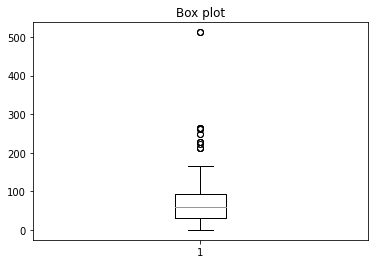

In [74]:
out_index_class1=outliers_iqr(df_train_class1['Fare'],1.5)
print(out_index_class1)
print(df_train_class1.loc[out_index_class1[0],'Fare'])

plt.boxplot(df_train_class1['Fare'][~np.isnan(df_train_class1['Fare'])],whis=1.5)
plt.title('Box plot')
plt.show()
#超出1.5的iqr可考慮刪除

(array([ 13,  19,  77, 127, 134, 136, 159]),)
13     73.5
19     73.5
77     73.5
127    65.0
134    73.5
136    73.5
159    65.0
Name: Fare, dtype: float64


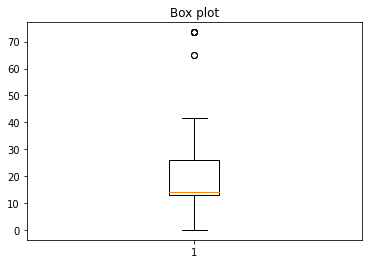

In [73]:
out_index_class2=outliers_iqr(df_train_class2['Fare'],1.5)
print(out_index_class2)
print(df_train_class2.loc[out_index_class2[0],'Fare'])

plt.boxplot(df_train_class2['Fare'][~np.isnan(df_train_class2['Fare'])],whis=1.5)
plt.title('Box plot')
plt.show()
#超出1.5的iqr可考慮刪除

(array([  8,  10,  15,  32,  35,  37,  42,  44,  53,  76,  92,  99, 103,
       105, 106, 107, 113, 114, 124, 143, 156, 158, 163, 184, 201, 217,
       247, 267, 284, 300, 301, 334, 348, 350, 353, 354, 373, 376, 377,
       381, 400, 431, 434, 445, 449, 452, 454, 462, 467, 469, 476, 488]),)
8      31.2750
10     29.1250
15     31.3875
32     39.6875
35     46.9000
37     27.9000
42     46.9000
44     56.4958
53     34.3750
76     31.2750
92     34.3750
99     69.5500
103    39.6875
105    27.9000
106    56.4958
107    29.1250
113    69.5500
114    31.3875
124    69.5500
143    31.3875
156    31.3875
158    39.6875
163    29.1250
184    69.5500
201    27.9000
217    46.9000
247    34.3750
267    46.9000
284    56.4958
300    31.2750
301    31.2750
334    31.2750
348    27.9000
350    39.6875
353    27.9000
354    56.4958
373    46.9000
376    46.9000
377    39.6875
381    56.4958
400    34.3750
431    29.1250
434    69.5500
445    31.2750
449    27.9000
452    39.6875
454    56.4958
462

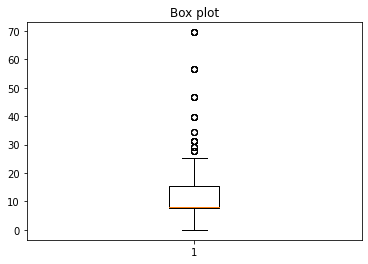

In [75]:
out_index_class3=outliers_iqr(df_train_class3['Fare'],1.5)
print(out_index_class3)
print(df_train_class3.loc[out_index_class3[0],'Fare'])

plt.boxplot(df_train_class3['Fare'][~np.isnan(df_train_class3['Fare'])],whis=1.5)
plt.title('Box plot')
plt.show()
#超出1.5的iqr可考慮刪除